In [1]:
import pandas as pd
import numpy as np




In [2]:
acceso_internet_2017 = '../data/CSV_TICS/Acceso_internet_CCAA_2017.csv'

# Variables TICS

## Leemos los datos del fichero con variables TICS

In [3]:
TICS_2017 = pd.read_csv(acceso_internet_2017, sep =';')

# Guardar el archivo con formato 'csv utf-8 (delimitado por comas)' para que no den problemas las palabras acentuadas

In [4]:
# Pasamos los diferentes tipos de conexión seleccionados a columnas
# 1. Creamos una lista con la columna de Comunidades autónomas y dejamos un solo valor de cada categoría. ordenamos la lista creada. Colocamos esta lista como indice y colocamos en primer lugar la última categoría que corresponde al 'Total nacional'. Borramos la que queda al final que es 'Total nacional'


comunidades_autonomas = TICS_2017["Comunidades y Ciudades Autónomas"].unique()
comunidades_autonomas_ordenada = sorted(list(comunidades_autonomas)) 
comunidades_autonomas_ordenada.insert(0, comunidades_autonomas_ordenada[-1])
comunidades_autonomas_ordenada.pop()

# 2. Creamos una lista que corresponde con los valores de la columna en la que aparecen los diferentes tipos de conexión. 
# 3. Creamos un diccionario cuyas claves seran los valores de cada uno de los items de esta variable (tipo_conex) y recogerá los valores de la columna 2 del dataframe ('Total')
# 4. Para cada fila se le indica que ha de colocar en cada columna (comunidad, tipo_conex y valor)
# 5. cada fila con los datos incluidos que corresponden en cada columna se irá añadiendo al diccionario
# 6. Pasamos el diccionario final a data frame

tipo_conex = TICS_2017["Forma de conexión"].unique()
diccionario_final = {}
for conex in tipo_conex:
    diccionario_final[conex] = []
for row in TICS_2017.iterrows():
    comunidad = row[1][0]
    tipo_conex = row[1][1]
    valor = row[1][2]
    diccionario_final[tipo_conex].append(valor)

TICS_2017 = pd.DataFrame(diccionario_final, index=comunidades_autonomas_ordenada)



## Eliminamos algunas columnas que no interesan para el estudio

In [5]:
TO_TICS_2017 = ['Viviendas con conexión de banda ancha', 'Viviendas con conexión de banda estrecha', 'Conexión de banda estrecha por llamada telefónica a través de su línea de teléfono convencional (módem) o RDSI','Conexión móvil de banda estrecha (otros teléfonos móviles -GPRS-)']

TICS_2017.drop(TO_TICS_2017, inplace = True, axis=1)


## Renombramos las columnas seleccionadas del fichero

In [6]:
# Renombramos los encabezados de las columnas 

TICS_2017 = TICS_2017.rename(columns = 
{'Total de viviendas que disponen de acceso a Internet y declaran las formas de conexión utilizadas': 'Declaran acceso_internet_2017', 
'Conexión de banda ancha por ADSL': 'ADSL', 
'Conexión de banda ancha por red de cable o fibra óptica': 'cable_fibra optica',
'Otras conexiones fijas de banda ancha (vía satélite, WiFi público o WiMax)': 'otras conexiones', 
'Conexión móvil de banda ancha vía modem USB ó tarjeta (en portátiles, p.ej.)':'movil_USB'})




In [7]:
# Renombrar la columna 4
TICS_2017.rename(columns={ TICS_2017.columns[4]: 'conexion movil_dispositivo_mano' }, inplace = True)


## Pasamos la variable string a numérica

In [8]:
TICS_2017 = TICS_2017.stack().str.replace(',','.').unstack()

In [9]:
TICS_2017[['ADSL', 'cable_fibra optica','otras conexiones', 'conexion movil_dispositivo_mano', 'movil_USB']]= TICS_2017[['ADSL', 'cable_fibra optica','otras conexiones', 'conexion movil_dispositivo_mano', 'movil_USB']].astype(float)


In [10]:
TICS_2017['Declaran acceso_internet_2017'] = TICS_2017['Declaran acceso_internet_2017'].apply(lambda x: x.split('.')).apply(''.join)


In [11]:
TICS_2017[['Declaran acceso_internet_2017']]= TICS_2017[['Declaran acceso_internet_2017']].astype(int)

## Ordenamos los datos en base a la variable índice constituida por las CCAA

In [12]:
TICS_2017 = TICS_2017.sort_index()

## Pasamos la variable índice (CCAA) a columna y reseteamos el índice

In [13]:
TICS_2017['index'] = TICS_2017.index

In [14]:
TICS_2017 = TICS_2017.reset_index(drop = True)

# VARIABLES DE SALUD FÍSICA Y MENTAL

## Mismo proceso que para el fichero TICS con todas las variables de Salud Física, Mental y salud percibida

### 1. Leer el fichero csv colocando como índice la variable de CCAA
### 2. Eliminar las columnas que no interesan para el estudio del archivo correspondiente a cada variable seleccionada
### 3. Renombrar las columnas que se mantienen en el archivo
### 4. Pasar a float las variables string
### 5. Ordenar el archivo por la variable índice
### 6. Pasar el índice a columna y resetear el índice



In [15]:
# Comprobar que se pueden leer bien todos los archivos a unir

Concentrarse = pd.read_csv("../data/CSV_Salud/Concentrarse_2017.csv", index_col = [0], sep =';')
Diabetes = pd.read_csv("../data/CSV_Salud/Diabetes.csv", index_col = [0], sep =';')
Dificultades_ver = pd.read_csv("../data/CSV_Salud/Dificultades_ver_2017.csv", index_col = [0], sep =';')
Dolor_espalda = pd.read_csv("../data/CSV_Salud/Dolor_espalda_2017.csv", index_col = [0], sep =';')
Infarto_miocardio = pd.read_csv("../data/CSV_Salud/Infarto_miocardio_2017.csv", index_col = [0], sep =';')
Restricc_AVD_Dolor = pd.read_csv("../data/CSV_Salud/Restricc_AVD_Dolor.csv", index_col = [0], sep =';')
Masa_corporal = pd.read_csv("../data/CSV_Salud/Masa_corporal_2017.csv", index_col = [0], sep =';')
Migraña = pd.read_csv("../data/CSV_Salud/Migraña_2017.csv", index_col = [0], sep =';')
Problemas_salud_mental = pd.read_csv("../data/CSV_Salud/Problemas_salud_mental_2017.csv", index_col = [0], sep =';')
salud_mental = pd.read_csv("../data/CSV_Salud/salud_mental_2017.csv", index_col = [0], sep =';')
Salud_percibida = pd.read_csv("../data/CSV_Salud/Salud_percibida_2017.csv", index_col = [0], sep =';')
Tension_alta = pd.read_csv("../data/CSV_Salud/Tension_2017.csv", index_col = [0], sep =';')



In [16]:
Columnas = [0,3]
Concentrarse.drop(Concentrarse.columns[Columnas], inplace = True, axis =1)


In [17]:
Concentrarse.rename(columns={Concentrarse.columns[0]: "Alguna Dificultad Conc", Concentrarse.columns[1]: "Mucha Dificultad Conc" }, inplace = True)


In [18]:
# Pasar a float los valores de todas las columnas
Concentrarse = Concentrarse.stack().str.replace(',','.').unstack()


In [19]:
Concentrarse[['Alguna Dificultad Conc', 'Mucha Dificultad Conc']]= Concentrarse[['Alguna Dificultad Conc','Mucha Dificultad Conc']].astype(float)

In [20]:
Concentrarse = Concentrarse.sort_index()

In [21]:
Concentrarse['index'] = Concentrarse.index

In [22]:
Concentrarse = Concentrarse.reset_index(drop = True)

In [23]:
Diabetes = pd.read_csv("../data/CSV_Salud/Diabetes.csv", index_col = [0], sep =';')

In [24]:
Diabetes.rename(columns={ Diabetes.columns[0]: "Diabetes" }, inplace = True)


In [25]:

Diabetes = Diabetes.stack().str.replace(',','.').unstack()


In [26]:
Diabetes[['Diabetes']]= Diabetes[['Diabetes']].astype(float)

In [27]:
Diabetes = Diabetes.sort_index()

In [28]:
Diabetes['index'] = Diabetes.index

In [29]:
Diabetes = Diabetes.reset_index(drop = True)

In [30]:
Dificultades_ver.rename(columns={Dificultades_ver.columns[0]: "Alguna Dificultad Ver", Dificultades_ver.columns[1]: "Mucha Dificultad Ver" }, inplace = True)

In [31]:
Dificultades_ver = Dificultades_ver.stack().str.replace(',','.').unstack()


In [32]:
Dificultades_ver[['Alguna Dificultad Ver', 'Mucha Dificultad Ver']]= Dificultades_ver[['Alguna Dificultad Ver','Mucha Dificultad Ver']].astype(float)

In [33]:
Dificultades_ver = Dificultades_ver.sort_index()

In [34]:
Dificultades_ver['index'] = Dificultades_ver.index

In [35]:
Dificultades_ver = Dificultades_ver.reset_index(drop = True)

In [36]:
# borrar una fila
Dolor_espalda = Dolor_espalda.drop (Dolor_espalda.index[[0]])


In [37]:
# cambiar la coma por un punto para poder pasar a float el string

Dolor_espalda = Dolor_espalda.stack().str.replace(',','.').unstack()

In [38]:
# Pasar a float el string

Dolor_espalda[['Dolor espalda crónico cervical', 'Dolor espalda crónico lumbar']]= Dolor_espalda[['Dolor espalda crónico cervical','Dolor espalda crónico lumbar']].astype(float)

In [39]:
Dolor_espalda = Dolor_espalda.rename(columns = 
{'Dolor espalda crónico cervical': 'Dolor espalda cronico cervical', 
'Dolor espalda crónico lumbar': 'Dolor espalda cronico lumbar'})

In [40]:
Dolor_espalda = Dolor_espalda.sort_index()

In [41]:
Dolor_espalda['index'] = Dolor_espalda.index

In [42]:
Dolor_espalda = Dolor_espalda.reset_index(drop = True)

In [43]:
Columnas = [1]
Infarto_miocardio.drop(Infarto_miocardio.columns[Columnas], inplace = True, axis =1)

In [44]:
Infarto_miocardio.rename(columns={Infarto_miocardio.columns[0]: "Infarto_miocardio" }, inplace = True)

In [45]:
Infarto_miocardio = Infarto_miocardio.stack().str.replace(',','.').unstack()

In [46]:
Infarto_miocardio[['Infarto_miocardio']]= Infarto_miocardio[['Infarto_miocardio']].astype(float)

In [47]:
Infarto_miocardio = Infarto_miocardio.sort_index()

In [48]:
Infarto_miocardio['index'] = Infarto_miocardio.index

In [49]:
Infarto_miocardio = Infarto_miocardio.reset_index(drop = True)

In [50]:
Columnas = [1]
Restricc_AVD_Dolor.drop(Restricc_AVD_Dolor.columns[Columnas], inplace = True, axis =1)

In [51]:
Restricc_AVD_Dolor.rename(columns={Restricc_AVD_Dolor.columns[0]: "Restricc_AVD_Dolor" }, inplace = True)

In [52]:
Restricc_AVD_Dolor = Restricc_AVD_Dolor.stack().str.replace(',','.').unstack()

In [53]:
Restricc_AVD_Dolor[['Restricc_AVD_Dolor']]= Restricc_AVD_Dolor[['Restricc_AVD_Dolor']].astype(float)

In [54]:
Restricc_AVD_Dolor = Restricc_AVD_Dolor.sort_index()

In [55]:
Restricc_AVD_Dolor['index'] = Restricc_AVD_Dolor.index

In [56]:
Restricc_AVD_Dolor = Restricc_AVD_Dolor.reset_index(drop = True)

In [57]:
Columnas = [0,1,3]
Masa_corporal.drop(Masa_corporal.columns[Columnas], inplace = True, axis =1)

In [58]:
Masa_corporal.rename(columns={Masa_corporal.columns[0]: "Sobrepeso" }, inplace = True)

In [59]:
Masa_corporal = Masa_corporal.stack().str.replace(',','.').unstack()

In [60]:
Masa_corporal[['Sobrepeso']]= Masa_corporal[['Sobrepeso']].astype(float)

In [61]:
Masa_corporal = Masa_corporal.sort_index()

In [62]:
Masa_corporal['index'] = Masa_corporal.index

In [63]:
Masa_corporal = Masa_corporal.reset_index(drop = True)

In [64]:
Migraña.rename(columns={ Migraña.columns[0]: "Migraña" }, inplace = True)

In [65]:
Migraña = Migraña.stack().str.replace(',','.').unstack()

In [66]:
Migraña[['Migraña']]= Migraña[['Migraña']].astype(float)

In [67]:
Migraña = Migraña.sort_index()

In [68]:
Migraña['index'] = Migraña.index

In [69]:
Migraña = Migraña.reset_index(drop = True)

In [70]:
Columnas = [1,3,5]
Problemas_salud_mental.drop(Problemas_salud_mental.columns[Columnas], inplace = True, axis =1)

In [71]:
Problemas_salud_mental.rename(columns={Problemas_salud_mental.columns[0]: "Depresión", Problemas_salud_mental.columns[1]: "Ansiedad" , Problemas_salud_mental.columns[2]: "Otros probl Salud_mental"}, inplace = True)

In [72]:
Problemas_salud_mental = Problemas_salud_mental.stack().str.replace(',','.').unstack()

In [73]:
Problemas_salud_mental[['Depresión', 'Ansiedad', 'Otros probl Salud_mental']]= Problemas_salud_mental[['Depresión', 'Ansiedad', 'Otros probl Salud_mental']].astype(float)

In [74]:
Problemas_salud_mental = Problemas_salud_mental.rename(columns = {'Depresión': 'Depresion'})

In [75]:
Problemas_salud_mental = Problemas_salud_mental.sort_index()

In [76]:
Problemas_salud_mental['index'] = Problemas_salud_mental.index

In [77]:
Problemas_salud_mental = Problemas_salud_mental.reset_index(drop = True)

In [78]:
Columnas = [1]
salud_mental.drop(salud_mental.columns[Columnas], inplace = True, axis =1)


In [79]:
salud_mental.rename(columns={salud_mental.columns[0]: "Salud_mental: Media"}, inplace = True)

In [80]:
salud_mental = salud_mental.stack().str.replace(',','.').unstack()

In [81]:
salud_mental[['Salud_mental: Media']]= salud_mental[['Salud_mental: Media']].astype(float)

In [82]:
salud_mental = salud_mental.sort_index()

In [83]:
salud_mental['index'] = salud_mental.index

In [84]:
salud_mental = salud_mental.reset_index(drop = True)

In [85]:
Columnas = [0,3,4]
Salud_percibida.drop(Salud_percibida .columns[Columnas], inplace = True, axis =1)

In [86]:
Salud_percibida.rename(columns={Salud_percibida.columns[0]: "Buena Salud", Salud_percibida.columns[1]: "Salud Regular"}, inplace = True)


In [87]:
Salud_percibida = Salud_percibida.stack().str.replace(',','.').unstack()

In [88]:
Salud_percibida[['Buena Salud']]= Salud_percibida[['Salud Regular']].astype(float)

In [89]:
Salud_percibida = Salud_percibida.sort_index()

In [90]:
Salud_percibida['index'] = Salud_percibida.index

In [91]:
Salud_percibida = Salud_percibida.reset_index(drop = True)

In [92]:
Tension_alta.rename(columns={Tension_alta.columns[0]: "Tension: alta"}, inplace = True)

In [93]:
Tension_alta = Tension_alta.stack().str.replace(',','.').unstack()

In [94]:
Tension_alta[['Tension: alta']]= Tension_alta[['Tension: alta']].astype(float)

In [95]:
Tension_alta = Tension_alta.sort_index()

In [96]:
Tension_alta['index'] = Tension_alta.index

In [97]:
Tension_alta = Tension_alta.reset_index(drop = True)

# VARIABLES DE CONTROL

## Mismo proceso que para los ficheros TICS Salud Física, Mental y salud percibida

### 1. Leer el fichero csv colocando como índice la variable de CCAA
### 2. Eliminar las columnas que no interesan para el estudio del archivo correspondiente a cada variable seleccionada
### 3. Renombrar las columnas que se mantienen en el archivo
### 4. Pasar a float las variables string
### 5. Ordenar el archivo por la variable índice
### 6. Pasar el índice a columna y resetear el índice


In [98]:
Renta_hogar = pd.read_csv("../data/CSV_Control/Renta media_mediana_hogar_2018.csv", index_col = [0], sep =';')
Tasa_paro = pd.read_csv("../data/CSV_Control/Tasa_paro_2017.csv", index_col = [0], sep =';')
Indice_masculinidad = pd.read_csv("../data/CSV_Control/Sexo.csv", index_col = [0], sep =';')
Edad_25_59 = pd.read_csv("../data/CSV_Control/Edad_2018.csv", index_col = [0], sep =';')
Educacion_superior = pd.read_csv("../data/CSV_Control/Educacion_Superior_2017.csv", index_col = [0], sep =';')

In [99]:
Columnas = [1]
Renta_hogar.drop(Renta_hogar .columns[Columnas], inplace = True, axis =1)

In [100]:
Renta_hogar.rename(columns={Renta_hogar.columns[0]: "Renta_media_hogar"}, inplace = True)

In [101]:
Renta_hogar = Renta_hogar.sort_index()

In [102]:
Renta_hogar['index'] = Renta_hogar.index

In [103]:
Renta_hogar = Renta_hogar.reset_index(drop = True)

In [104]:
Tasa_paro.rename(columns={Tasa_paro.columns[0]: "Tasa_paro"}, inplace = True)

In [105]:
Tasa_paro = Tasa_paro.stack().str.replace(',','.').unstack()

In [106]:
Tasa_paro[['Tasa_paro']]= Tasa_paro[['Tasa_paro']].astype(float)

In [107]:
Tasa_paro = Tasa_paro.sort_index()

In [108]:
Tasa_paro['index'] = Tasa_paro.index

In [109]:
Tasa_paro = Tasa_paro.reset_index(drop = True)

In [110]:
Columnas = [0,1]
Indice_masculinidad.drop(Indice_masculinidad .columns[Columnas], inplace = True, axis =1)


In [111]:
Indice_masculinidad.rename(columns={Indice_masculinidad.columns[0]: "Índice_masculinidad"}, inplace = True)

In [112]:
Indice_masculinidad = Indice_masculinidad.stack().str.replace(',','.').unstack()

In [113]:
Indice_masculinidad[['Índice_masculinidad']]= Indice_masculinidad[['Índice_masculinidad']].astype(float)

In [114]:
Indice_masculinidad = Indice_masculinidad.rename(columns = {'Índice_masculinidad': 'Indice_masculinidad'})

In [115]:
Indice_masculinidad = Indice_masculinidad.sort_index()

In [116]:
Indice_masculinidad['index'] = Indice_masculinidad.index

In [117]:
Indice_masculinidad = Indice_masculinidad.reset_index(drop = True)

In [118]:
Columnas = [0,1]
Edad_25_59.drop(Edad_25_59.columns[Columnas], inplace = True, axis =1)


In [119]:
Edad_25_59.rename(columns={Edad_25_59.columns[0]: "Edad_25_59 años"}, inplace = True)

In [120]:
Edad_25_59 = Edad_25_59.stack().str.replace(',','.').unstack()

In [121]:
Edad_25_59[['Edad_25_59 años']]= Edad_25_59[['Edad_25_59 años']].astype(float)

In [122]:
Edad_25_59 = Edad_25_59.sort_index()

In [123]:
Edad_25_59['index'] = Edad_25_59.index

In [124]:
Edad_25_59 = Edad_25_59.reset_index(drop = True)

In [125]:
Educacion_superior.rename(columns={Educacion_superior.columns[0]: "Educacion_superior"}, inplace = True)

In [126]:
Educacion_superior = Educacion_superior.stack().str.replace(',','.').unstack()

In [127]:
Educacion_superior[['Educacion_superior']]= Educacion_superior[['Educacion_superior']].astype(float)

In [128]:
Educacion_superior = Educacion_superior.sort_index()

In [129]:
Educacion_superior['index'] = Educacion_superior.index

In [130]:
Educacion_superior = Educacion_superior.reset_index(drop = True)

In [131]:
"""
import utils.mining_data_tb as mdt

Concentrarse = mdt.borra_columna_index(dataframe=Concentrarse)
mdt.borra_columna_index(dataframe=Diabetes)
"""

'\nimport utils.mining_data_tb as mdt\n\nConcentrarse = mdt.borra_columna_index(dataframe=Concentrarse)\nmdt.borra_columna_index(dataframe=Diabetes)\n'

## Eliminar la columna "index" de todos los ficheros excepto de el de TICS (columna que corresponde a las CCAA)

In [132]:
del Concentrarse['index']
del Diabetes['index']
del Dificultades_ver['index']
del Dolor_espalda['index']
del Infarto_miocardio['index']
del Restricc_AVD_Dolor['index']
del Masa_corporal['index']
del Migraña['index']
del Problemas_salud_mental['index']
del salud_mental['index']
del Salud_percibida['index']
del Tension_alta['index']




In [133]:
del Renta_hogar['index']
del Tasa_paro['index']
del Indice_masculinidad['index']
del Edad_25_59['index']
del Educacion_superior['index']



# Generación de bases de datos de trabajo
## Base TICS_Control
## Base completa con todas las variables 
## Base TICS_Salud Física
## Base TICS_Salud Mental
## Base TICS_Salud percibida


In [134]:
Base_completa = pd.concat([TICS_2017, Concentrarse, Diabetes, Dificultades_ver, Dolor_espalda, Infarto_miocardio, Restricc_AVD_Dolor, Masa_corporal, Migraña, Problemas_salud_mental, salud_mental,Salud_percibida, Tension_alta, Renta_hogar, Tasa_paro, Indice_masculinidad, Edad_25_59, Educacion_superior], axis=1)

In [287]:
Base_completa.shape

(20, 30)

In [135]:
Base_completa.to_csv('../data/Bases/Base_completa.csv')

In [136]:
Base_completa.to_json("../src/api/static/Base_completa.json", orient = "records")

In [137]:
# Base TICS_salud física
TICS_Control = Base_completa.drop(columns=['Alguna Dificultad Conc', 'Mucha Dificultad Conc', 'Diabetes','Alguna Dificultad Ver', 'Mucha Dificultad Ver', 'Dolor espalda cronico cervical', 'Dolor espalda cronico lumbar', 'Infarto_miocardio', 'Restricc_AVD_Dolor', 'Sobrepeso', 'Migraña', 'Depresion', 'Ansiedad', 'Otros probl Salud_mental', 'Salud_mental: Media', 'Buena Salud', 'Salud Regular', 'Tension: alta'], axis=1)


In [138]:
TICS_Control.to_csv('../data/Bases/TICS_Control.csv')

In [139]:
# Base TICS_Salud_Física
TICS_Salud_Fisica = Base_completa.drop(columns=['Depresion', 'Ansiedad', 'Otros probl Salud_mental', 'Salud_mental: Media','Buena Salud', 'Salud Regular','Renta_media_hogar', 'Tasa_paro', 'Indice_masculinidad', 'Edad_25_59 años', 'Educacion_superior'], axis=1)

In [140]:
TICS_Salud_Fisica.to_csv('../data/Bases/TICS_Salud_Física.csv')

In [141]:
# Base TICS_Salud_Mental

TICS_Salud_Mental = Base_completa.drop(columns=['Alguna Dificultad Conc', 'Mucha Dificultad Conc', 'Diabetes','Alguna Dificultad Ver', 'Mucha Dificultad Ver', 'Dolor espalda cronico cervical', 'Dolor espalda cronico lumbar', 'Infarto_miocardio', 'Restricc_AVD_Dolor', 'Sobrepeso', 'Migraña', 'Buena Salud', 'Salud Regular', 'Tension: alta', 'Renta_media_hogar', 'Tasa_paro', 'Indice_masculinidad', 'Edad_25_59 años', 'Educacion_superior'], axis=1)

In [142]:
TICS_Salud_Mental.to_csv('../data/Bases/TICS_Salud_Mental.csv')

In [143]:
# Base TICS_Salud_Percibida

TICS_Salud_Percibida = Base_completa.drop(columns =['Alguna Dificultad Conc', 'Mucha Dificultad Conc', 'Diabetes',
       'Alguna Dificultad Ver', 'Mucha Dificultad Ver',
       'Dolor espalda cronico cervical', 'Dolor espalda cronico lumbar',
       'Infarto_miocardio', 'Restricc_AVD_Dolor', 'Sobrepeso', 'Migraña',
       'Depresion', 'Ansiedad', 'Otros probl Salud_mental',
       'Salud_mental: Media', 'Tension: alta',
       'Renta_media_hogar', 'Tasa_paro', 'Indice_masculinidad',
       'Edad_25_59 años', 'Educacion_superior'])

In [144]:
TICS_Salud_Percibida.to_csv('../data/Bases/TICS_Salud_Percibida.csv')

# Control de calidad de las bases de trabajo


In [145]:
TICS_Salud = pd.read_csv("../data/Bases/Base_completa.csv", sep =',')

## Identificar valores missing

In [308]:
missing_values_count = TICS_Salud.isnull().sum()

## Identificar registros duplicados

In [300]:
Duplicados = TICS_Salud.duplicated()

## Identificar outliers

In [146]:
import matplotlib.pyplot as plt

### Variables TICS

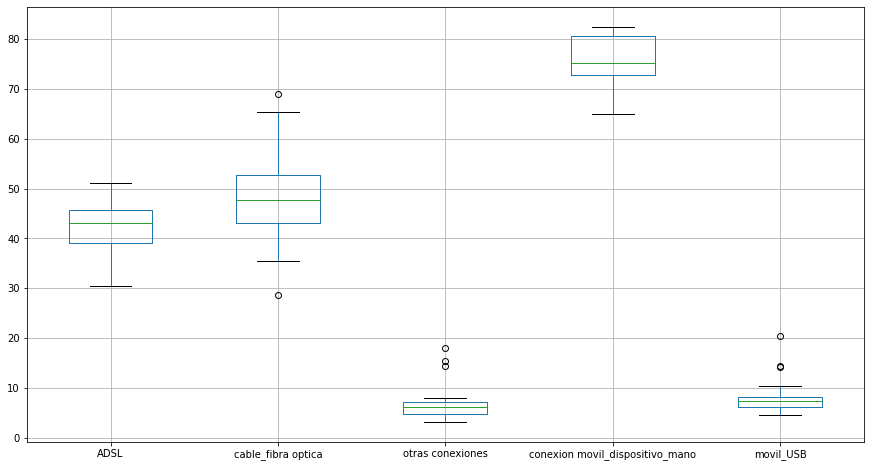

In [147]:
plt.figure(figsize=(15,8))

boxplot = TICS_Salud.boxplot(column=['ADSL','cable_fibra optica','otras conexiones','conexion movil_dispositivo_mano','movil_USB'])
boxplot.plot()

plt.savefig("../reports/Outliers/TICS.jpg", bbox_inches='tight')

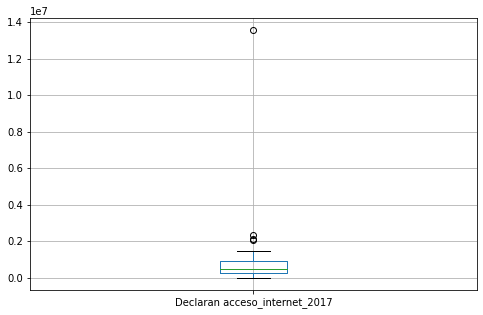

In [148]:
plt.figure(figsize=(8,5))

boxplot = TICS_Salud.boxplot(column=['Declaran acceso_internet_2017'])
boxplot.plot()
plt.savefig("../reports/Outliers/TICS_1.jpg", bbox_inches='tight')

### Variables de Salud física

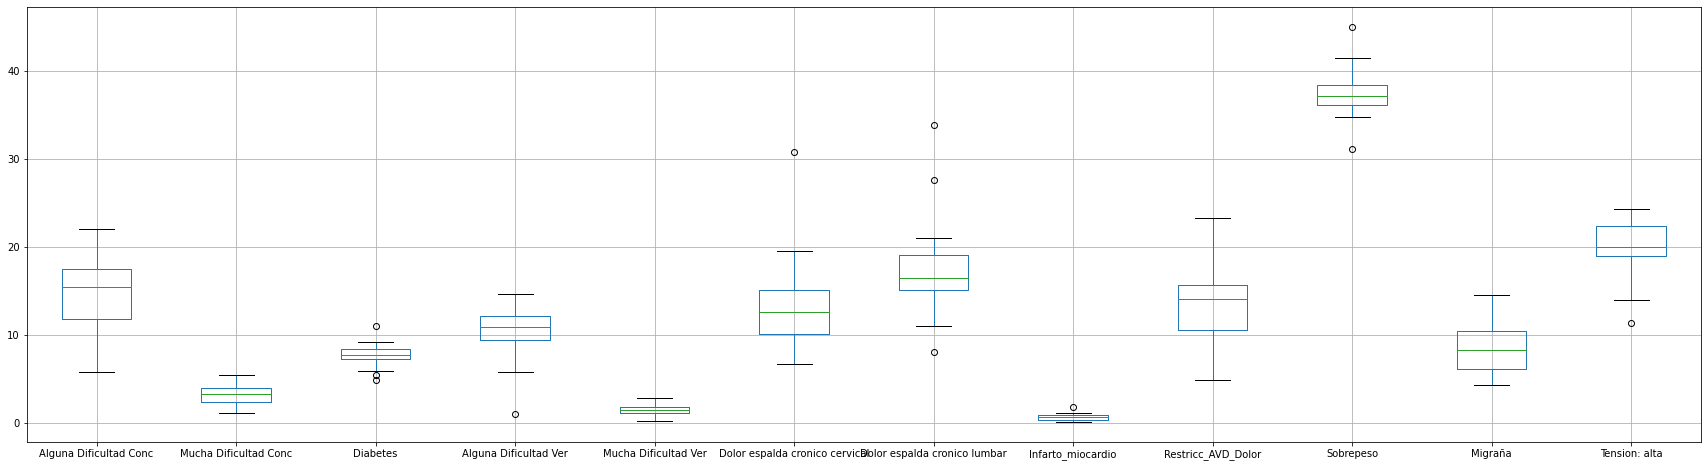

In [149]:
plt.figure(figsize=(30,8))

boxplot = TICS_Salud.boxplot(column=['Alguna Dificultad Conc','Mucha Dificultad Conc','Diabetes','Alguna Dificultad Ver','Mucha Dificultad Ver', 'Dolor espalda cronico cervical', 'Dolor espalda cronico lumbar', 'Infarto_miocardio', 'Restricc_AVD_Dolor', 'Sobrepeso', 'Migraña', 'Tension: alta'])
boxplot.plot()

plt.savefig("../reports/Outliers/Salud_fisica.jpg", bbox_inches='tight')

### Variables de Salud mental

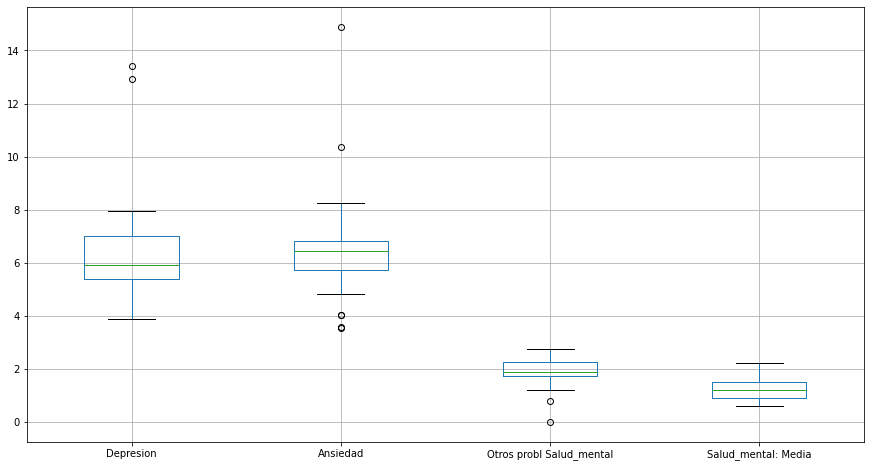

In [150]:
plt.figure(figsize=(15,8))

boxplot = TICS_Salud.boxplot(column=['Depresion', 'Ansiedad', 'Otros probl Salud_mental','Salud_mental: Media'])
boxplot.plot()
plt.savefig("../reports/Outliers/Salud_mental.jpg", bbox_inches='tight')

 Variables de Salud percibida

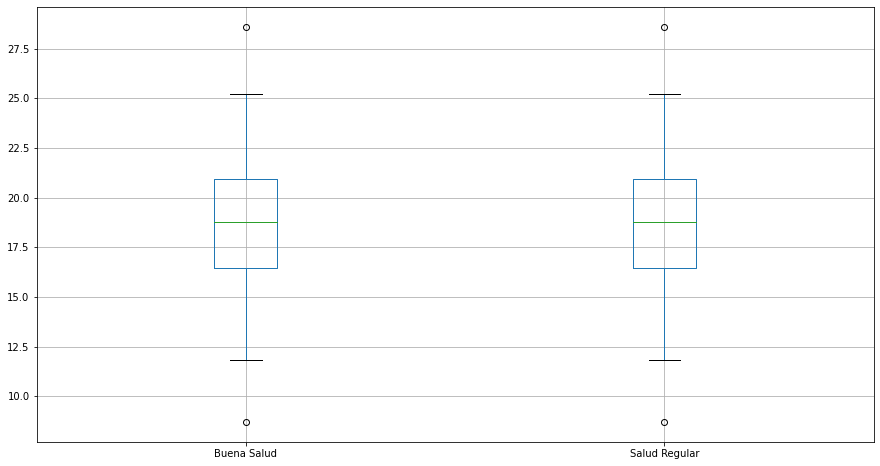

In [151]:
plt.figure(figsize=(15,8))

boxplot = TICS_Salud.boxplot(column=['Buena Salud', 'Salud Regular'])
boxplot.plot()

plt.savefig("../reports/Outliers/Salud_percibida.jpg", bbox_inches='tight')

### Variables de control 

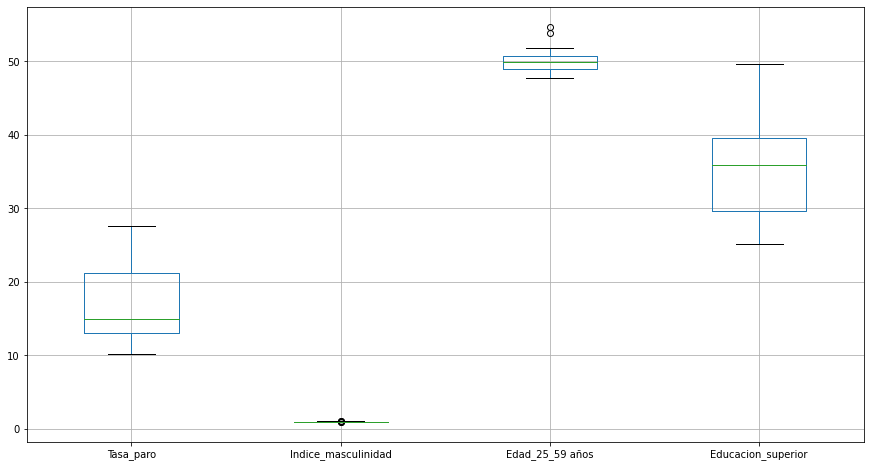

In [153]:
plt.figure(figsize=(15,8))

boxplot = TICS_Salud.boxplot(column=['Tasa_paro', 'Indice_masculinidad', 'Edad_25_59 años', 'Educacion_superior'])
boxplot.plot()

plt.savefig("../reports/Outliers/Control.jpg", bbox_inches='tight')

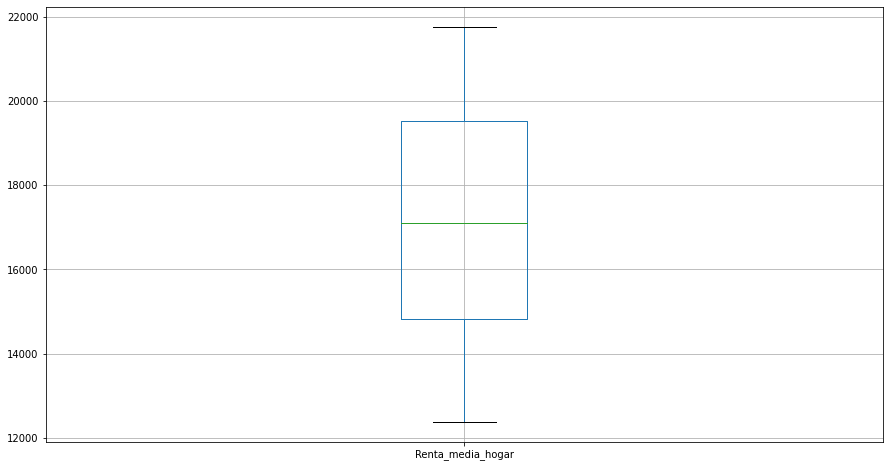

In [154]:
plt.figure(figsize=(15,8))

boxplot = TICS_Salud.boxplot(column=['Renta_media_hogar'])
boxplot.plot()

plt.savefig("../reports/Outliers/Control_1.jpg", bbox_inches='tight')

## Tendencias de cada columna


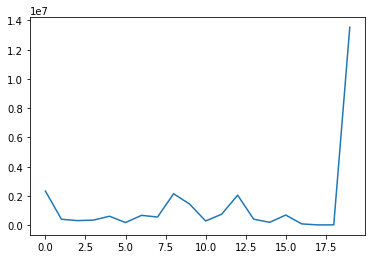

In [155]:
TICS_Salud['Declaran acceso_internet_2017'].plot()
plt.savefig("../reports/Tendencias/Acceso_internet.jpg", bbox_inches='tight')

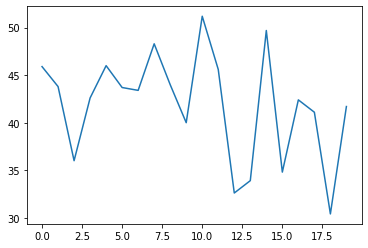

In [156]:
TICS_Salud['ADSL'].plot()
plt.savefig("../reports/Tendencias/ADSL.jpg", bbox_inches='tight')

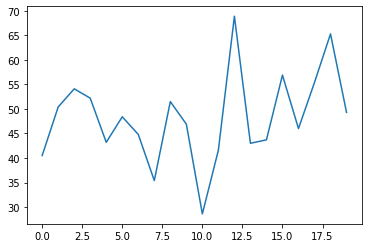

In [157]:
TICS_Salud['cable_fibra optica'].plot()
plt.savefig("../reports/Tendencias/cable_fibra optica.jpg", bbox_inches='tight')

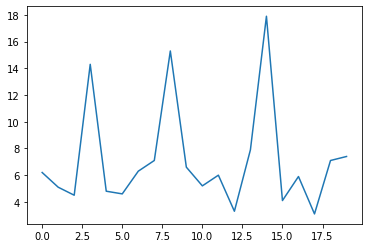

In [158]:
TICS_Salud['otras conexiones'].plot()
plt.savefig("../reports/Tendencias/otras conexiones.jpg", bbox_inches='tight')

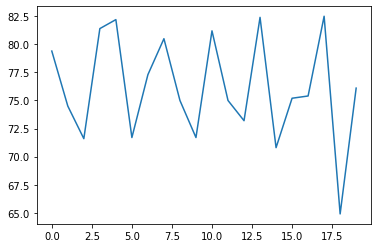

In [159]:
TICS_Salud['conexion movil_dispositivo_mano'].plot()
plt.savefig("../reports/Tendencias/conexion movil_dispositivo_mano.jpg", bbox_inches='tight')

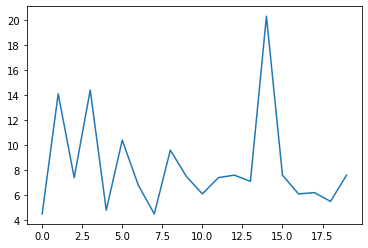

In [160]:
TICS_Salud['movil_USB'].plot()
plt.savefig("../reports/Tendencias/movil_USB.jpg", bbox_inches='tight')

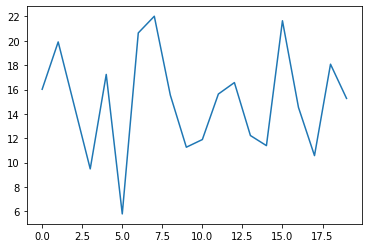

In [162]:
TICS_Salud['Alguna Dificultad Conc'].plot()
plt.savefig("../reports/Tendencias/Alguna Dificultad Conc.jpg", bbox_inches='tight')

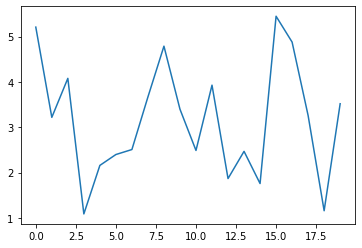

In [163]:
TICS_Salud['Mucha Dificultad Conc'].plot()
plt.savefig("../reports/Tendencias/Mucha Dificultad Conc.jpg", bbox_inches='tight')

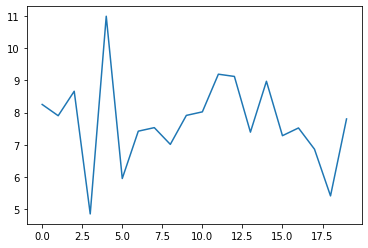

In [164]:
TICS_Salud['Diabetes'].plot()
plt.savefig("../reports/Tendencias/Diabetes.jpg", bbox_inches='tight')

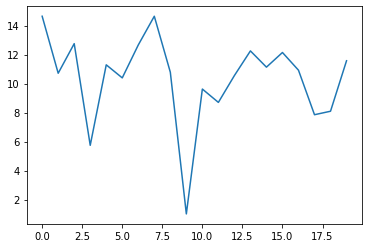

In [165]:
TICS_Salud['Alguna Dificultad Ver'].plot()
plt.savefig("../reports/Tendencias/Alguna Dificultad Ver.jpg", bbox_inches='tight')

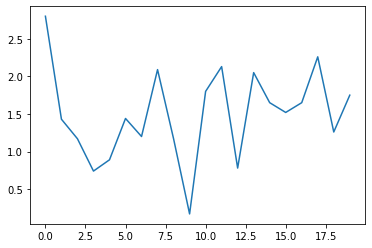

In [166]:
TICS_Salud['Mucha Dificultad Ver'].plot()
plt.savefig("../reports/Tendencias/Mucha Dificultad Ver.jpg", bbox_inches='tight')

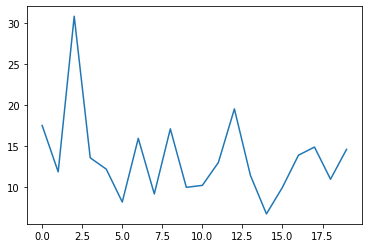

In [167]:
TICS_Salud['Dolor espalda cronico cervical'].plot()
plt.savefig("../reports/Tendencias/Dolor espalda cronico cervical.jpg", bbox_inches='tight')

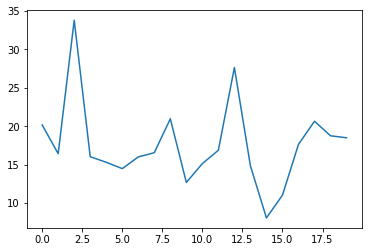

In [168]:
TICS_Salud['Dolor espalda cronico lumbar'].plot()
plt.savefig("../reports/Tendencias/Dolor espalda cronico lumbar.jpg", bbox_inches='tight')

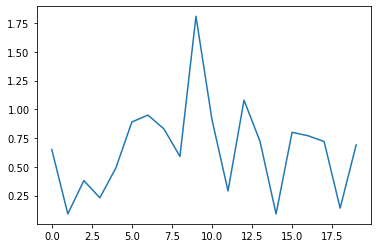

In [169]:
TICS_Salud['Infarto_miocardio'].plot()
plt.savefig("../reports/Tendencias/Infarto_miocardio.jpg", bbox_inches='tight')

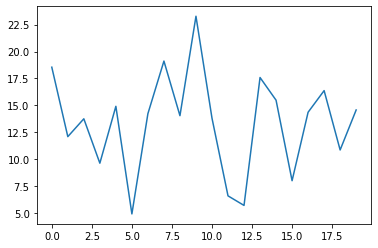

In [170]:
TICS_Salud['Restricc_AVD_Dolor'].plot()
plt.savefig("../reports/Tendencias/Restricc_AVD_Dolor.jpg", bbox_inches='tight')

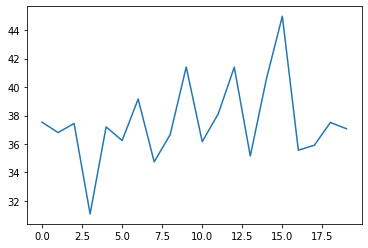

In [171]:
TICS_Salud['Sobrepeso'].plot()
plt.savefig("../reports/Tendencias/Sobrepeso.jpg", bbox_inches='tight')

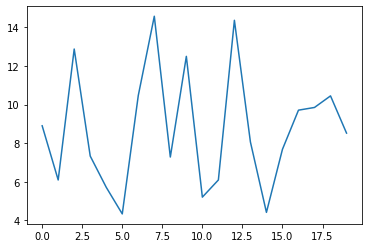

In [172]:
TICS_Salud['Migraña'].plot()
plt.savefig("../reports/Tendencias/Migraña.jpg", bbox_inches='tight')

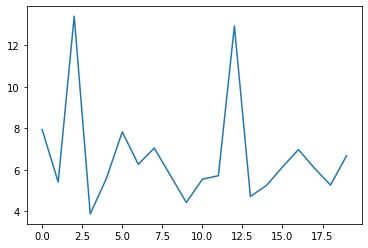

In [173]:
TICS_Salud['Depresion'].plot()
plt.savefig("../reports/Tendencias/Depresion.jpg", bbox_inches='tight')

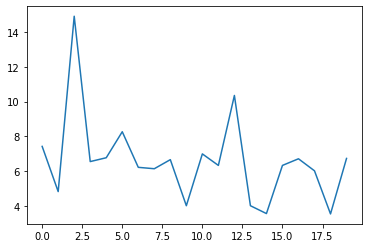

In [174]:
TICS_Salud['Ansiedad'].plot()
plt.savefig("../reports/Tendencias/Ansiedad.jpg", bbox_inches='tight')

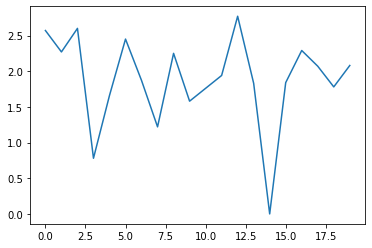

In [175]:
TICS_Salud['Otros probl Salud_mental'].plot()
plt.savefig("../reports/Tendencias/Otros probl Salud_mental.jpg", bbox_inches='tight')

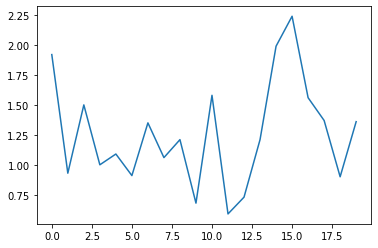

In [176]:
TICS_Salud['Salud_mental: Media'].plot()
plt.savefig("../reports/Tendencias/Salud_mental: Media.jpg", bbox_inches='tight')

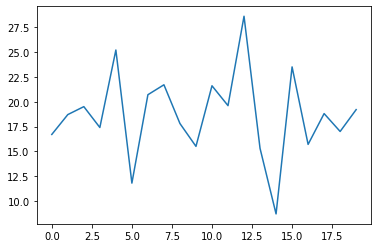

In [177]:
TICS_Salud['Buena Salud'].plot()
plt.savefig("../reports/Tendencias/Buena Salud.jpg", bbox_inches='tight')

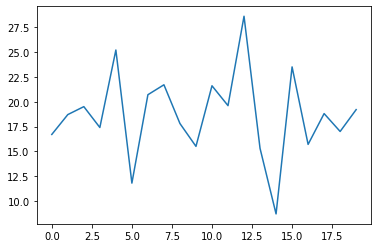

In [178]:
TICS_Salud['Salud Regular'].plot()
plt.savefig("../reports/Tendencias/Salud Regular.jpg", bbox_inches='tight')

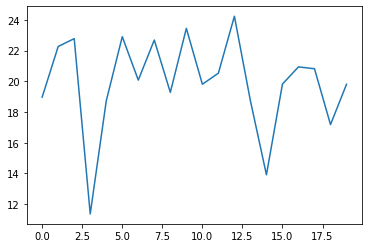

In [179]:
TICS_Salud['Tension: alta'].plot()
plt.savefig("../reports/Tendencias/Tension: alta.jpg", bbox_inches='tight')

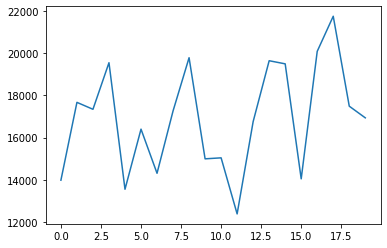

In [180]:
TICS_Salud['Renta_media_hogar'].plot()
plt.savefig("../reports/Tendencias/Renta_media_hogar.jpg", bbox_inches='tight')

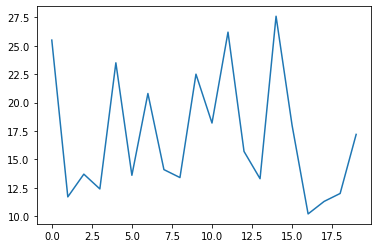

In [181]:
TICS_Salud['Tasa_paro'].plot()
plt.savefig("../reports/Tendencias/Tasa_paro.jpg", bbox_inches='tight')

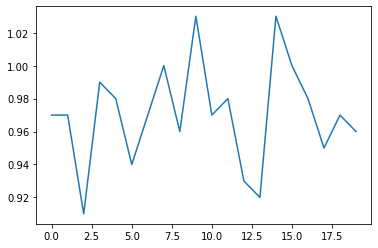

In [182]:
TICS_Salud['Indice_masculinidad'].plot()
plt.savefig("../reports/Tendencias/Indice_masculinidad.jpg", bbox_inches='tight')

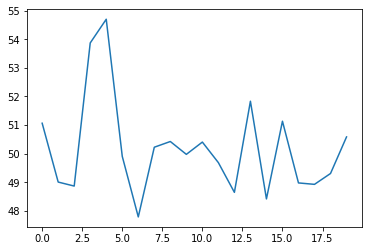

In [183]:
TICS_Salud['Edad_25_59 años'].plot()
plt.savefig("../reports/Tendencias/Edad_25_59 años.jpg", bbox_inches='tight')

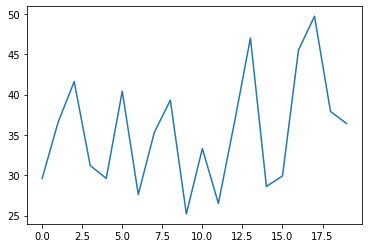

In [184]:
TICS_Salud['Educacion_superior'].plot()
plt.savefig("../reports/Tendencias/Educacion_superior.jpg", bbox_inches='tight')

## Histogramas

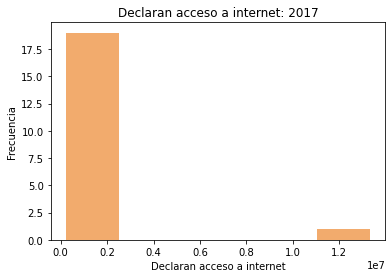

In [186]:
plt.hist(x=TICS_Salud['Declaran acceso_internet_2017'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Declaran acceso a internet: 2017')
plt.xlabel('Declaran acceso a internet')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Declaran acceso_internet_.jpg", bbox_inches='tight')

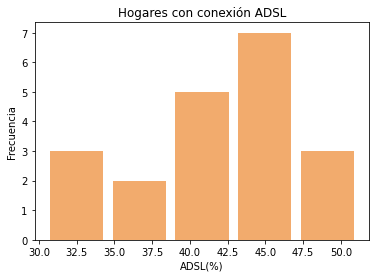

In [187]:
plt.hist(x=TICS_Salud['ADSL'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Hogares con conexión ADSL')
plt.xlabel('ADSL(%)')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/ADSL_.jpg", bbox_inches='tight')

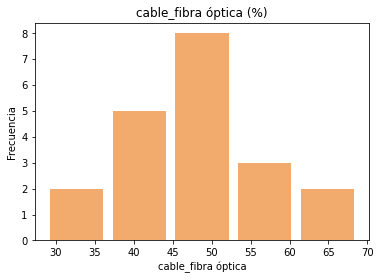

In [188]:
plt.hist(x=TICS_Salud['cable_fibra optica'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('cable_fibra óptica (%)')
plt.xlabel('cable_fibra óptica')
plt.ylabel('Frecuencia')


plt.savefig("../reports/Histograma/cable_fibra_optica.jpg", bbox_inches='tight')

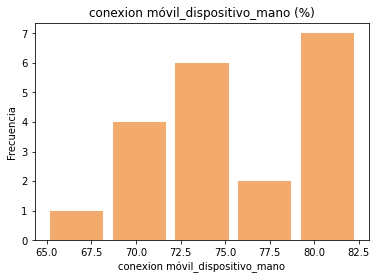

<Figure size 432x288 with 0 Axes>

In [189]:
plt.hist(x=TICS_Salud['conexion movil_dispositivo_mano'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('conexion móvil_dispositivo_mano (%)')
plt.xlabel('conexion móvil_dispositivo_mano')
plt.ylabel('Frecuencia')

plt.show()
plt.savefig("../reports/Histograma/conexion móvil_dispositivo_mano.jpg", bbox_inches='tight')

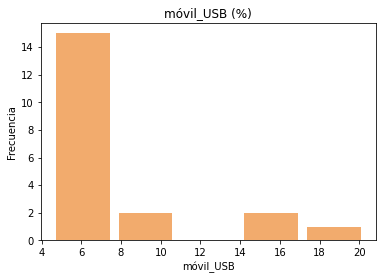

In [190]:
plt.hist(x=TICS_Salud['movil_USB'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('móvil_USB (%)')
plt.xlabel('móvil_USB')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/móvil_USB.jpg", bbox_inches='tight')

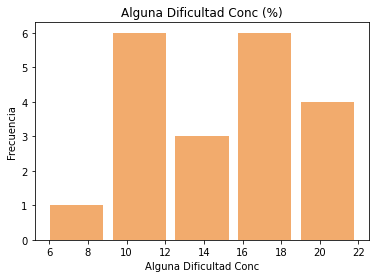

In [191]:
plt.hist(x=TICS_Salud['Alguna Dificultad Conc'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Alguna Dificultad Conc (%)')
plt.xlabel('Alguna Dificultad Conc')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Alguna Dificultad Conc.jpg", bbox_inches='tight')

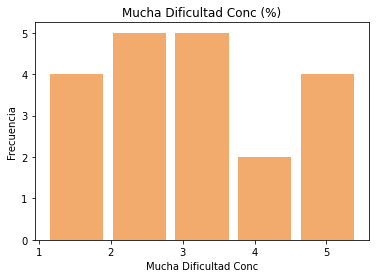

In [192]:
plt.hist(x=TICS_Salud['Mucha Dificultad Conc'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Mucha Dificultad Conc (%)')
plt.xlabel('Mucha Dificultad Conc')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Mucha Dificultad Conc.jpg", bbox_inches='tight')

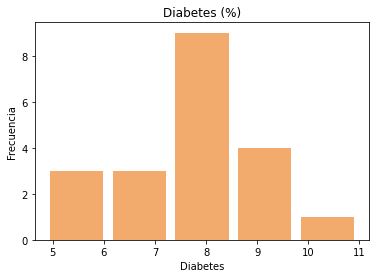

In [193]:
plt.hist(x=TICS_Salud['Diabetes'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Diabetes (%)')
plt.xlabel('Diabetes')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Diabetes.jpg", bbox_inches='tight')

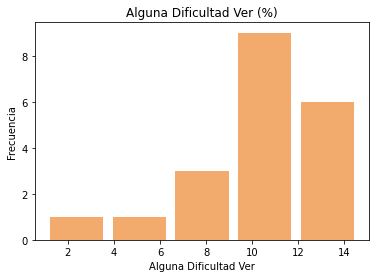

In [194]:
plt.hist(x=TICS_Salud['Alguna Dificultad Ver'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Alguna Dificultad Ver (%)')
plt.xlabel('Alguna Dificultad Ver')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Alguna Dificultad Ver.jpg", bbox_inches='tight')

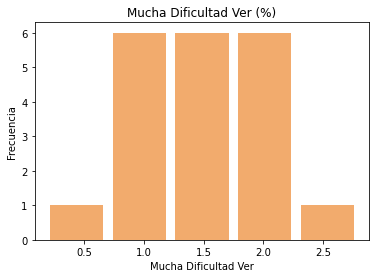

In [195]:
plt.hist(x=TICS_Salud['Mucha Dificultad Ver'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Mucha Dificultad Ver (%)')
plt.xlabel('Mucha Dificultad Ver')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Mucha Dificultad Ver.jpg", bbox_inches='tight')

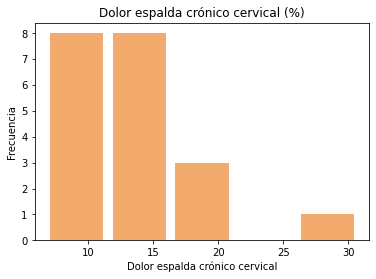

In [196]:
plt.hist(x=TICS_Salud['Dolor espalda cronico cervical'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Dolor espalda crónico cervical (%)')
plt.xlabel('Dolor espalda crónico cervical')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Dolor espalda cronico cervical.jpg", bbox_inches='tight')

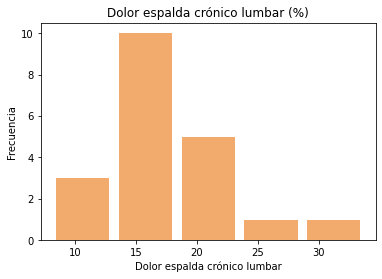

In [197]:
plt.hist(x=TICS_Salud['Dolor espalda cronico lumbar'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Dolor espalda crónico lumbar (%)')
plt.xlabel('Dolor espalda crónico lumbar')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Dolor espalda cronico lumbar.jpg", bbox_inches='tight')

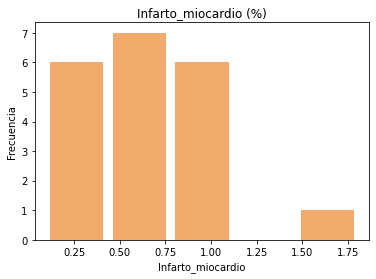

In [198]:
plt.hist(x=TICS_Salud['Infarto_miocardio'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Infarto_miocardio (%)')
plt.xlabel('Infarto_miocardio')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Infarto_miocardio.jpg", bbox_inches='tight')

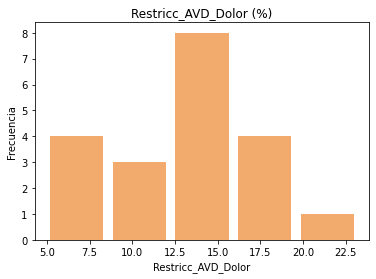

In [199]:
plt.hist(x=TICS_Salud['Restricc_AVD_Dolor'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Restricc_AVD_Dolor (%)')
plt.xlabel('Restricc_AVD_Dolor')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Restricc_AVD_Dolor.jpg", bbox_inches='tight')

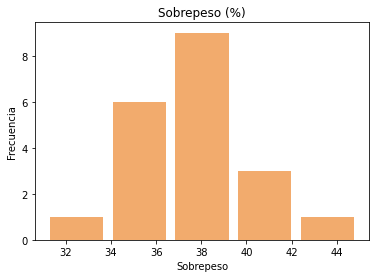

In [200]:
plt.hist(x=TICS_Salud['Sobrepeso'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Sobrepeso (%)')
plt.xlabel('Sobrepeso')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Sobrepeso.jpg", bbox_inches='tight')

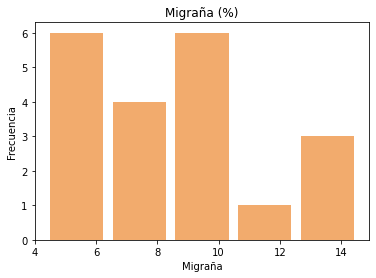

In [201]:
plt.hist(x=TICS_Salud['Migraña'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Migraña (%)')
plt.xlabel('Migraña')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Migraña.jpg", bbox_inches='tight')

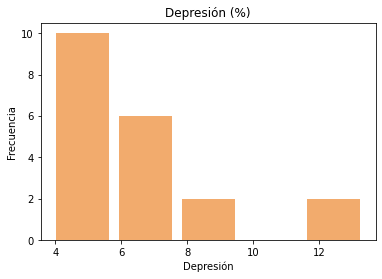

In [202]:
plt.hist(x=TICS_Salud['Depresion'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Depresión (%)')
plt.xlabel('Depresión')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Depresion.jpg", bbox_inches='tight')

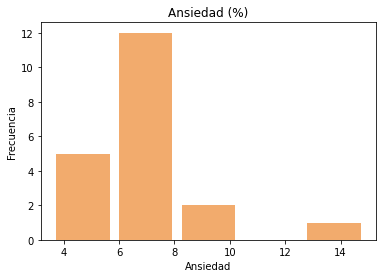

In [203]:
plt.hist(x=TICS_Salud['Ansiedad'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Ansiedad (%)')
plt.xlabel('Ansiedad')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Ansiedad.jpg", bbox_inches='tight')

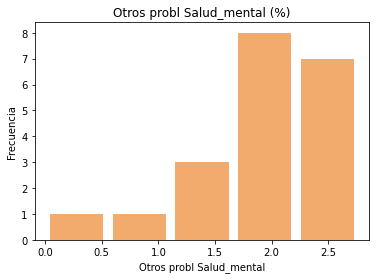

In [204]:
plt.hist(x=TICS_Salud['Otros probl Salud_mental'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Otros probl Salud_mental (%)')
plt.xlabel('Otros probl Salud_mental')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Otros probl Salud_mental.jpg", bbox_inches='tight')

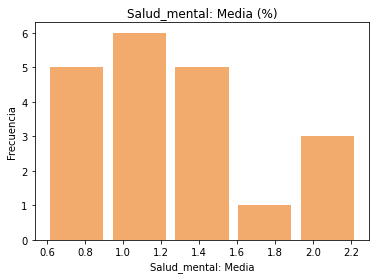

In [205]:
plt.hist(x=TICS_Salud['Salud_mental: Media'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Salud_mental: Media (%)')
plt.xlabel('Salud_mental: Media')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Salud_mental: Media.jpg", bbox_inches='tight')

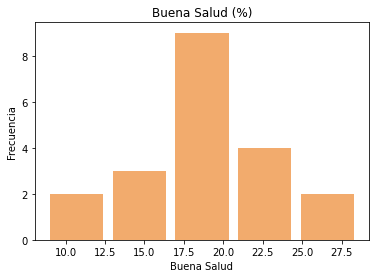

In [206]:
plt.hist(x=TICS_Salud['Buena Salud'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Buena Salud (%)')
plt.xlabel('Buena Salud')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Buena Salud.jpg", bbox_inches='tight')

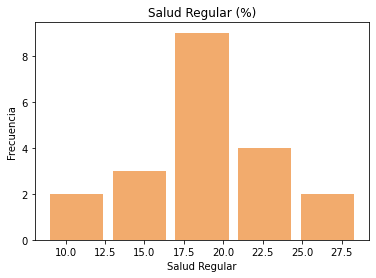

In [207]:
plt.hist(x=TICS_Salud['Salud Regular'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Salud Regular (%)')
plt.xlabel('Salud Regular')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Salud Regular.jpg", bbox_inches='tight')

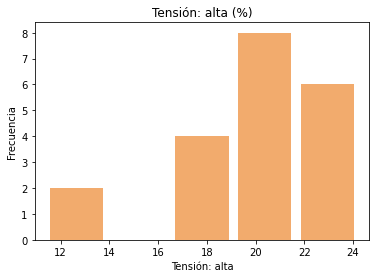

In [208]:
plt.hist(x=TICS_Salud['Tension: alta'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Tensión: alta (%)')
plt.xlabel('Tensión: alta')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Tension: alta.jpg", bbox_inches='tight')

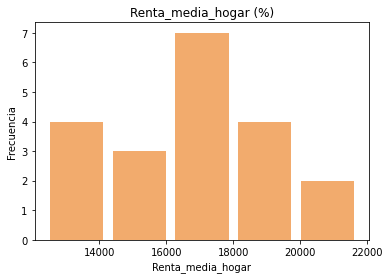

In [209]:
plt.hist(x=TICS_Salud['Renta_media_hogar'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Renta_media_hogar (%)')
plt.xlabel('Renta_media_hogar')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Renta_media_hogar.jpg", bbox_inches='tight')

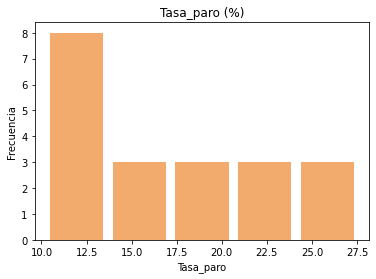

In [210]:
plt.hist(x=TICS_Salud['Tasa_paro'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Tasa_paro (%)')
plt.xlabel('Tasa_paro')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Tasa_paro.jpg", bbox_inches='tight')

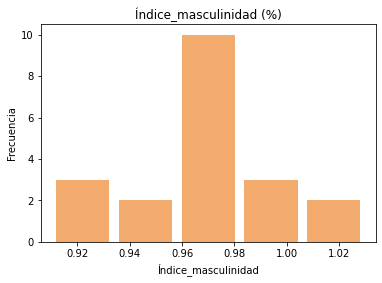

In [211]:
plt.hist(x=TICS_Salud['Indice_masculinidad'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Índice_masculinidad (%)')
plt.xlabel('Índice_masculinidad')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Indice_masculinidad.jpg", bbox_inches='tight')

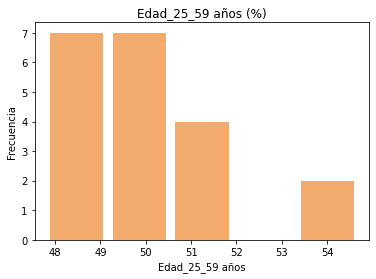

In [212]:
plt.hist(x=TICS_Salud['Edad_25_59 años'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Edad_25_59 años (%)')
plt.xlabel('Edad_25_59 años')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Edad_25_59 años.jpg", bbox_inches='tight')

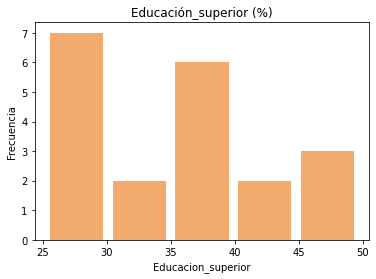

In [213]:
plt.hist(x=TICS_Salud['Educacion_superior'], bins=5, color='#F2AB6D', rwidth=0.85)
plt.title('Educación_superior (%)')
plt.xlabel('Educacion_superior')
plt.ylabel('Frecuencia')

plt.savefig("../reports/Histograma/Educacion_superior.jpg", bbox_inches='tight')

# Análisis de datos

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## leeemos los archivos con los que vamos a trabajar

In [215]:
TICS_Salud = pd.read_csv("../Data/Base_completa.csv", sep =',')
TICS_Salud_Fisica = pd.read_csv("../data/Bases/TICS_Salud_Física.csv", sep =',')
TICS_Salud_Mental = pd.read_csv("../data/Bases/TICS_Salud_Mental.csv", sep =',')
TICS_Salud_Percibida = pd.read_csv("../data/Bases/TICS_Salud_Percibida.csv", sep =',')
TICS_Control = pd.read_csv("../data/Bases/TICS_Control.csv", sep =',')

## Hallamos la correlación de Salud percibida con las de tipo de conexión TICS

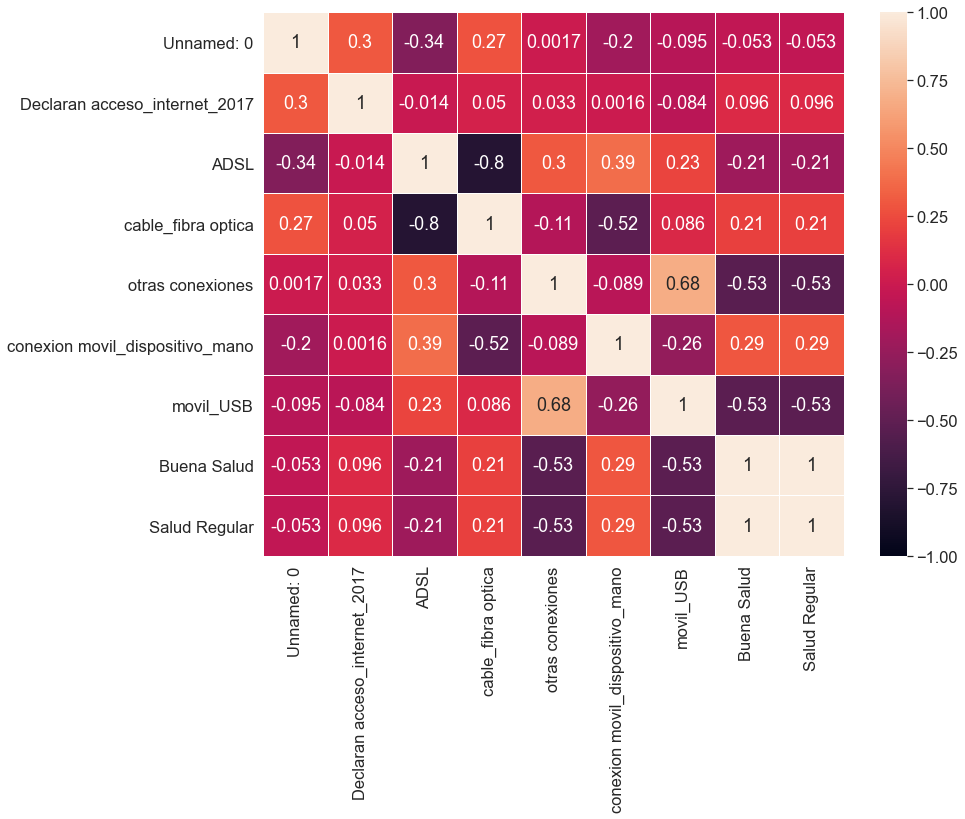

In [217]:
plt.subplots(figsize=(13, 10))
sns.set(font_scale=1.5)
sns.heatmap(TICS_Salud_Percibida.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

plt.savefig("../reports/Análisis/Salud_percibida.jpg", bbox_inches='tight')

## Hallamos la correlación de cada grupo de variables (Física, mental y control) con las de TICS

### Salud Física y TICS
### Salud Mental y TICS
### Control y TICS

In [ ]:
TICS_Salud_Fisica.corr()

In [ ]:
TICS_Salud_Mental.corr()

In [ ]:
TICS_Control.corr()

# Scatterplot de las CCAA en base a las variables TICS y de salud que correlacionan entre sí (Pearson >= .30)  

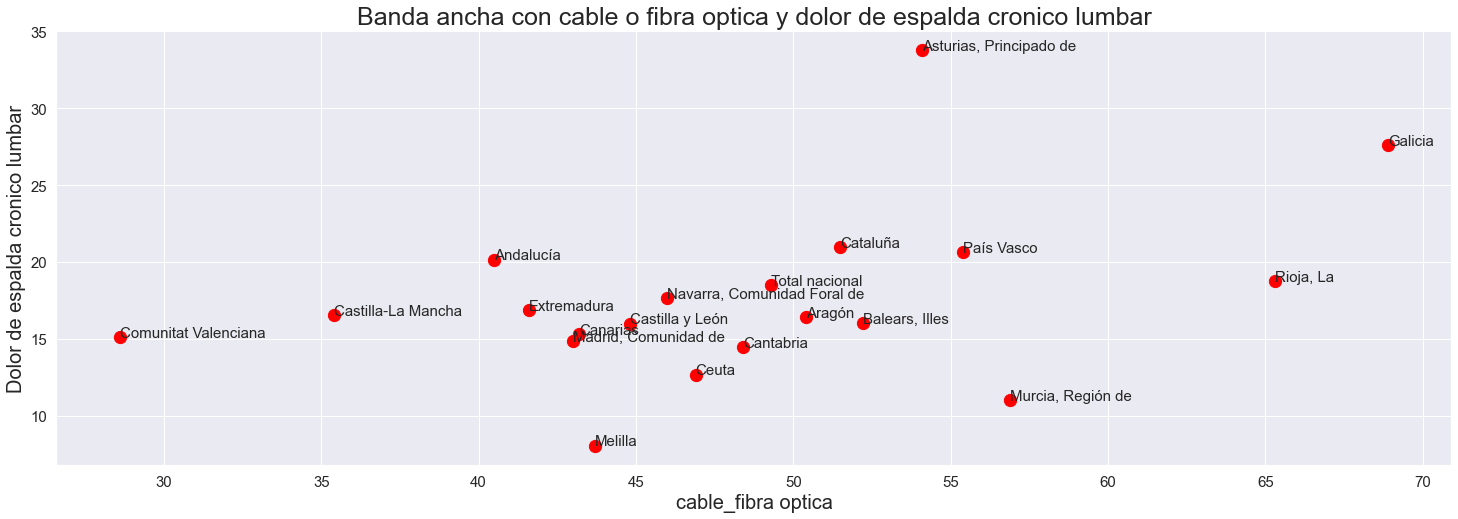

In [219]:
annotations=["Andalucía","Aragón","Asturias, Principado de","Balears, Illes","Canarias","Cantabria","Castilla y León","Castilla-La Mancha", "Cataluña","Ceuta","Comunitat Valenciana", "Extremadura","Galicia","Madrid, Comunidad de","Melilla","Murcia, Región de", "Navarra, Comunidad Foral de","País Vasco","Rioja, La", "Total nacional"]

plt.figure(figsize=(25,8))
plt.scatter(TICS_Salud_Fisica['cable_fibra optica'],TICS_Salud_Fisica['Dolor espalda cronico lumbar'], s=150,color="red")
plt.xlabel("cable_fibra optica", fontsize = 20)
plt.ylabel("Dolor de espalda cronico lumbar", fontsize = 20)
plt.title("Banda ancha con cable o fibra optica y dolor de espalda cronico lumbar",fontsize=25)
plt.tick_params(labelsize = 15)
for i, label in enumerate(annotations): 
    plt.text(TICS_Salud_Fisica['cable_fibra optica'][i], TICS_Salud_Fisica['Dolor espalda cronico lumbar'][i],label,fontsize = 15)

plt.savefig("../reports/Análisis/Fibra_Optica_Dolor_lumbar.jpg", bbox_inches='tight')

plt.show()

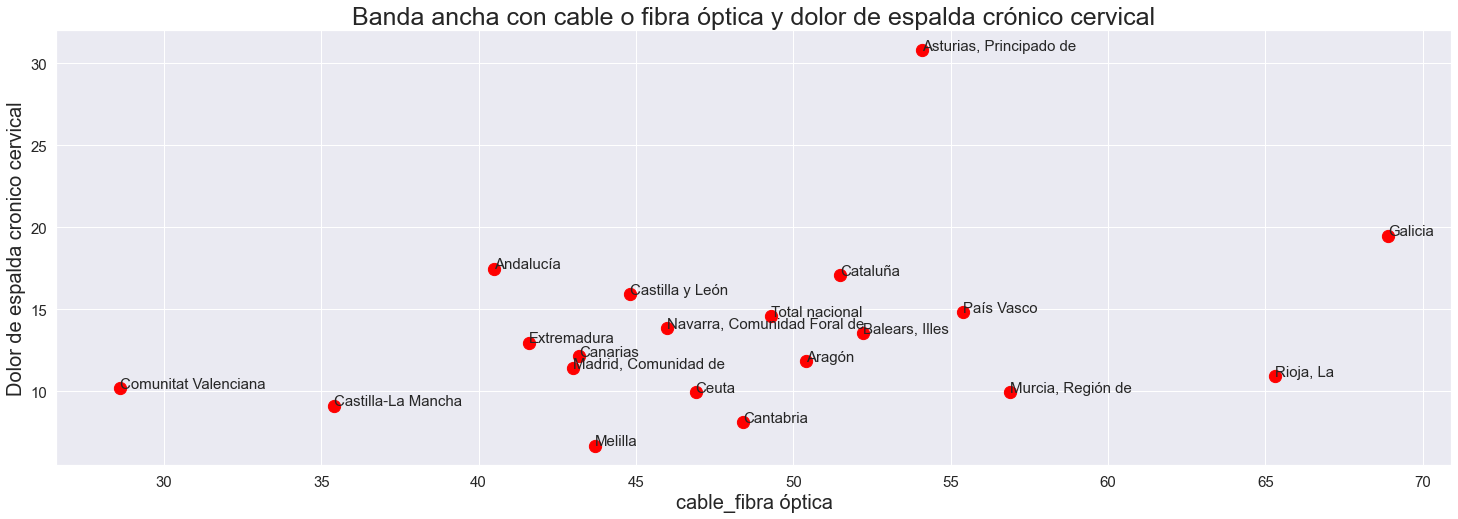

In [220]:
annotations=["Andalucía","Aragón","Asturias, Principado de","Balears, Illes","Canarias","Cantabria","Castilla y León","Castilla-La Mancha", "Cataluña","Ceuta","Comunitat Valenciana", "Extremadura","Galicia","Madrid, Comunidad de","Melilla","Murcia, Región de", "Navarra, Comunidad Foral de","País Vasco","Rioja, La", "Total nacional"]

plt.figure(figsize=(25,8))
plt.scatter(TICS_Salud_Fisica['cable_fibra optica'],TICS_Salud_Fisica['Dolor espalda cronico cervical'], s=150,color="red")
plt.xlabel("cable_fibra óptica", fontsize = 20)
plt.ylabel("Dolor de espalda cronico cervical", fontsize = 20)
plt.title("Banda ancha con cable o fibra óptica y dolor de espalda crónico cervical",fontsize=25)
plt.tick_params(labelsize = 15)
for i, label in enumerate(annotations):
    plt.text(TICS_Salud_Fisica['cable_fibra optica'][i], TICS_Salud_Fisica['Dolor espalda cronico cervical'][i],label, fontsize = 15)


plt.savefig("../reports/Análisis/Fibra_Optica_Dolor_cervical.jpg", bbox_inches='tight')

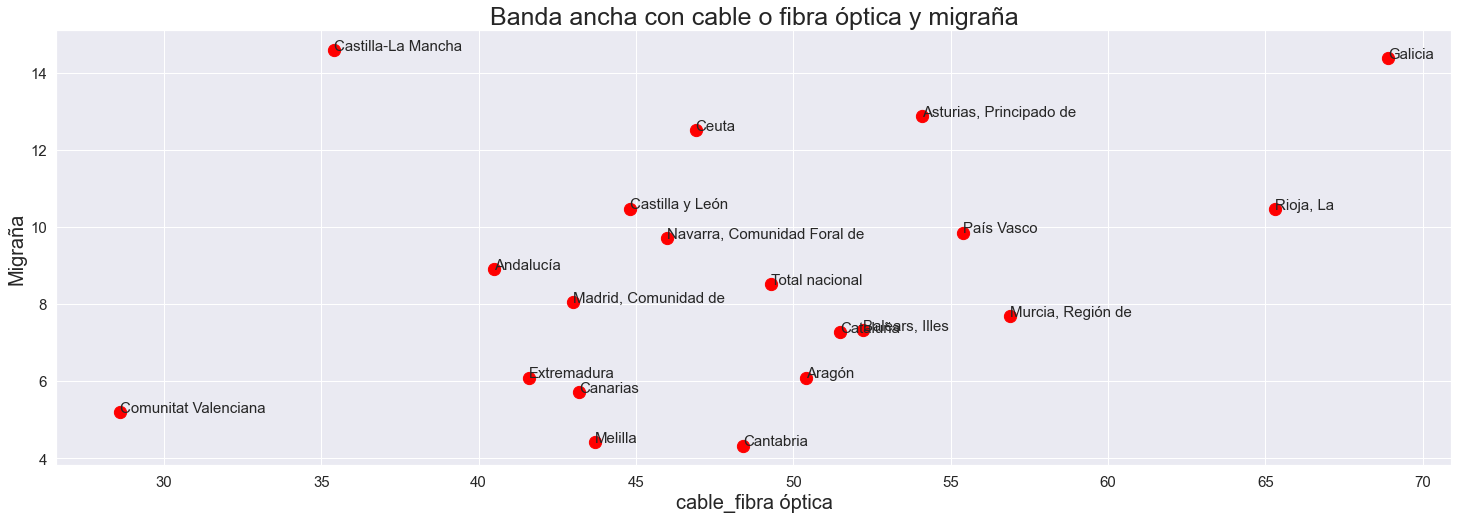

In [221]:
annotations=["Andalucía","Aragón","Asturias, Principado de","Balears, Illes","Canarias","Cantabria","Castilla y León","Castilla-La Mancha", "Cataluña","Ceuta","Comunitat Valenciana", "Extremadura","Galicia","Madrid, Comunidad de","Melilla","Murcia, Región de", "Navarra, Comunidad Foral de","País Vasco","Rioja, La", "Total nacional"]

plt.figure(figsize=(25,8))
plt.scatter(TICS_Salud_Fisica['cable_fibra optica'],TICS_Salud_Fisica['Migraña'], s=150,color="red")
plt.xlabel("cable_fibra óptica", fontsize = 20)
plt.ylabel("Migraña", fontsize=20)
plt.title("Banda ancha con cable o fibra óptica y migraña",fontsize=25)
for i, label in enumerate(annotations):
    plt.text(TICS_Salud_Fisica['cable_fibra optica'][i], TICS_Salud_Fisica['Migraña'][i],label, fontsize=15)
plt.tick_params(labelsize = 15)

plt.savefig("../reports/Análisis/Fibra_Optica_migraña.jpg", bbox_inches='tight')

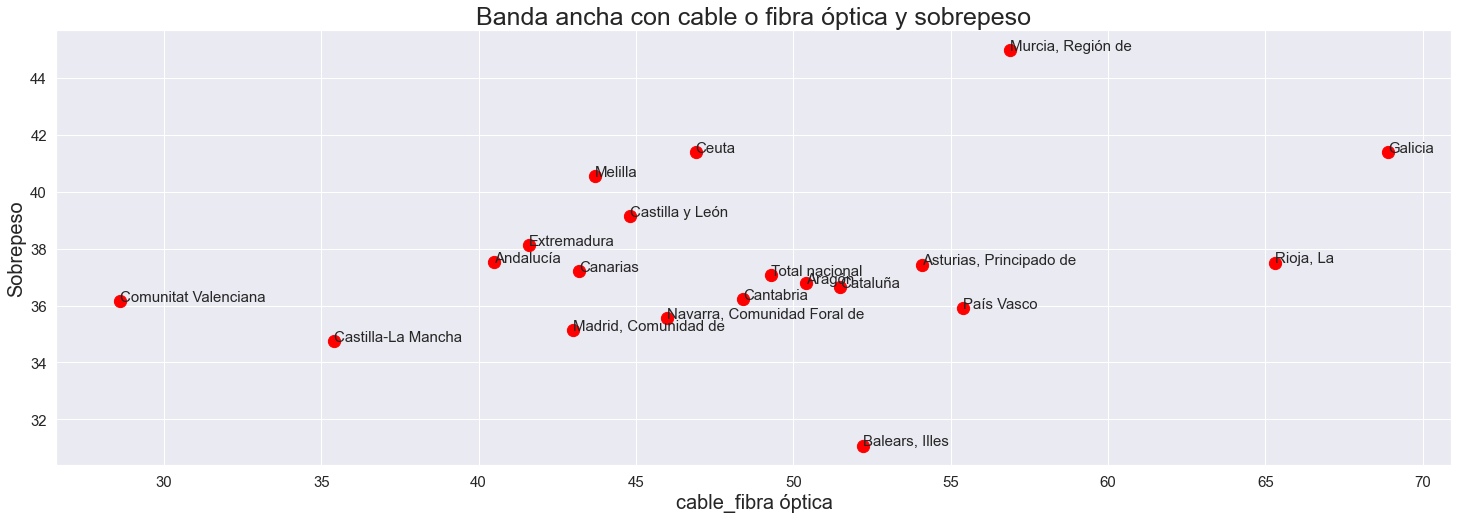

In [222]:
annotations=["Andalucía","Aragón","Asturias, Principado de","Balears, Illes","Canarias","Cantabria","Castilla y León","Castilla-La Mancha", "Cataluña","Ceuta","Comunitat Valenciana", "Extremadura","Galicia","Madrid, Comunidad de","Melilla","Murcia, Región de", "Navarra, Comunidad Foral de","País Vasco","Rioja, La", "Total nacional"]

plt.figure(figsize=(25,8))
plt.scatter(TICS_Salud_Fisica['cable_fibra optica'],TICS_Salud_Fisica['Sobrepeso'], s=150,color="red")
plt.xlabel("cable_fibra óptica", fontsize = 20)
plt.ylabel("Sobrepeso", fontsize = 20)
plt.title("Banda ancha con cable o fibra óptica y sobrepeso",fontsize=25)
for i, label in enumerate(annotations):
    plt.text(TICS_Salud_Fisica['cable_fibra optica'][i], TICS_Salud_Fisica['Sobrepeso'][i],label, fontsize =15)
plt.tick_params(labelsize=15)

plt.savefig("../reports/Análisis/Fibra_Optica_Sobrepeso.jpg", bbox_inches='tight')

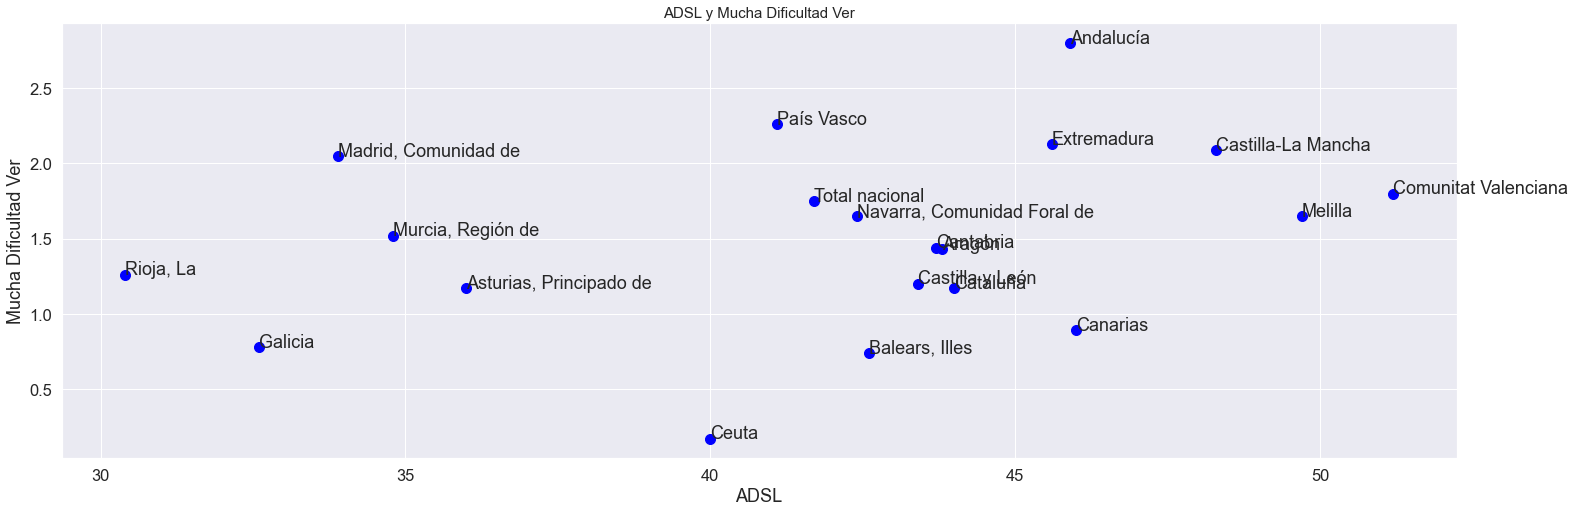

In [223]:
annotations=["Andalucía","Aragón","Asturias, Principado de","Balears, Illes","Canarias","Cantabria","Castilla y León","Castilla-La Mancha", "Cataluña","Ceuta","Comunitat Valenciana", "Extremadura","Galicia","Madrid, Comunidad de","Melilla","Murcia, Región de", "Navarra, Comunidad Foral de","País Vasco","Rioja, La", "Total nacional"]

plt.figure(figsize=(25,8))
plt.scatter(TICS_Salud_Fisica['ADSL'],TICS_Salud_Fisica['Mucha Dificultad Ver'], s=100,color="blue")
plt.xlabel("ADSL")
plt.ylabel("Mucha Dificultad Ver")
plt.title("ADSL y Mucha Dificultad Ver",fontsize=15)
for i, label in enumerate(annotations):
    plt.text(TICS_Salud_Fisica['ADSL'][i], TICS_Salud_Fisica['Mucha Dificultad Ver'][i],label)

plt.savefig("../reports/Análisis/ADSL_Dificultad_ver.jpg", bbox_inches='tight')


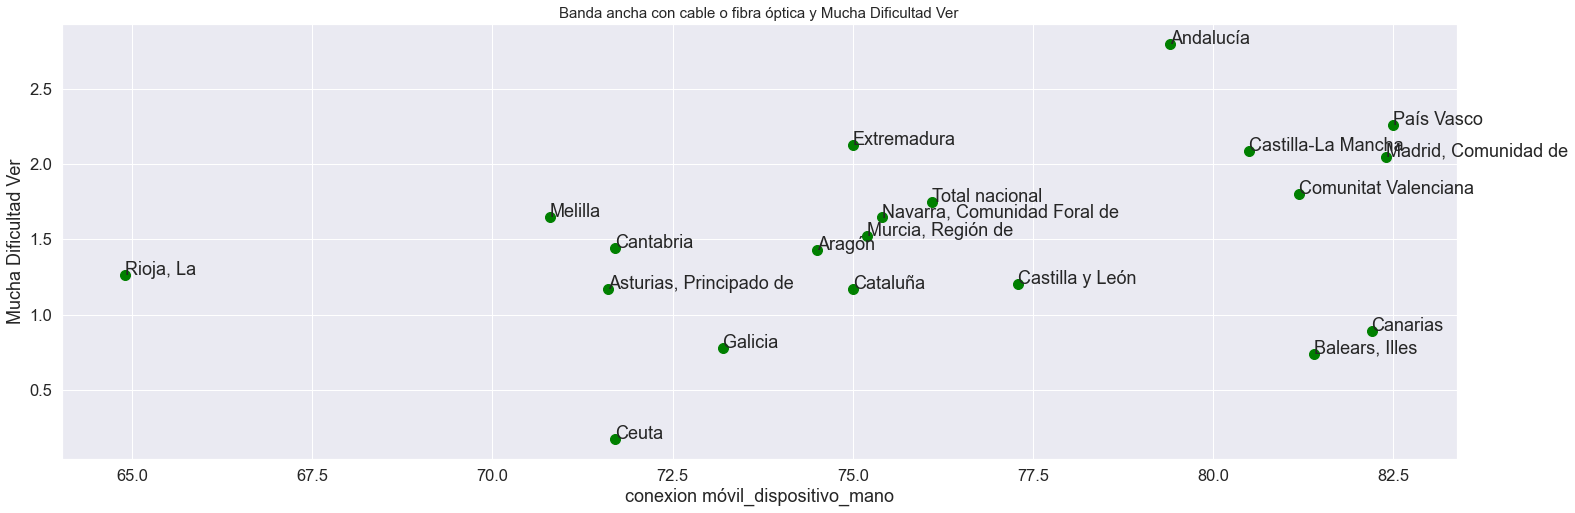

In [224]:
annotations=["Andalucía","Aragón","Asturias, Principado de","Balears, Illes","Canarias","Cantabria","Castilla y León","Castilla-La Mancha", "Cataluña","Ceuta","Comunitat Valenciana", "Extremadura","Galicia","Madrid, Comunidad de","Melilla","Murcia, Región de", "Navarra, Comunidad Foral de","País Vasco","Rioja, La", "Total nacional"]

plt.figure(figsize=(25,8))
plt.scatter(TICS_Salud_Fisica['conexion movil_dispositivo_mano'],TICS_Salud_Fisica['Mucha Dificultad Ver'], s=100,color="green")
plt.xlabel("conexion móvil_dispositivo_mano")
plt.ylabel("Mucha Dificultad Ver")
plt.title("Banda ancha con cable o fibra óptica y Mucha Dificultad Ver",fontsize=15)
for i, label in enumerate(annotations):
    plt.text(TICS_Salud_Fisica['conexion movil_dispositivo_mano'][i], TICS_Salud_Fisica['Mucha Dificultad Ver'][i],label)

plt.savefig("../reports/Análisis/Conexion_movil_Mano_Dificultad_ver.jpg", bbox_inches='tight')


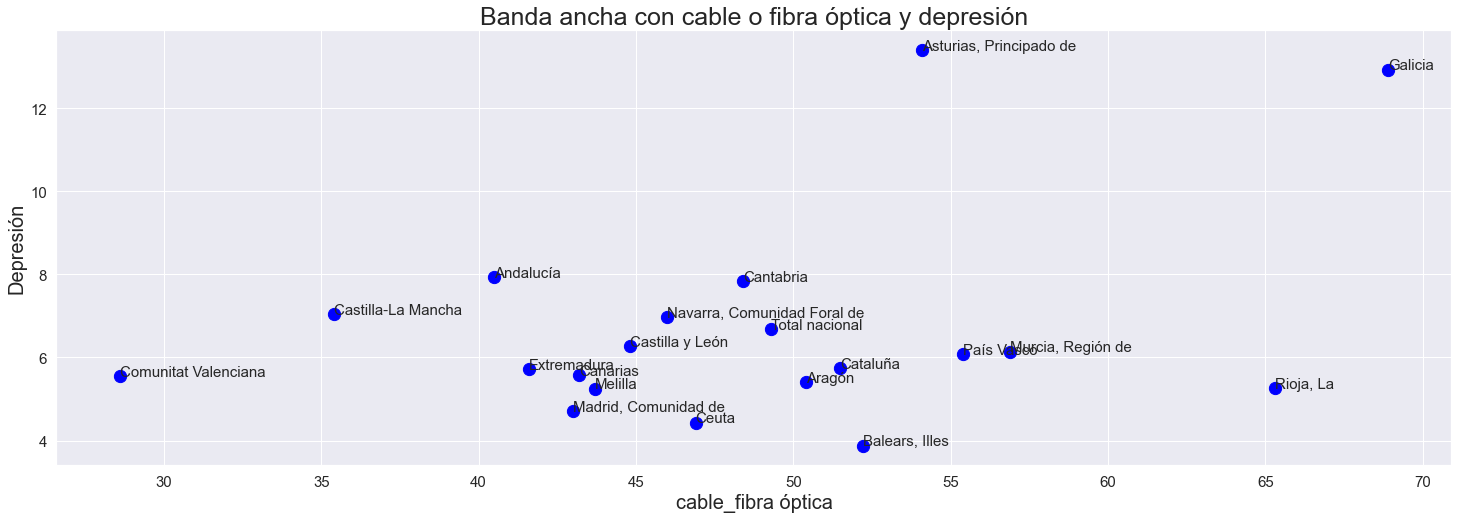

In [225]:
annotations=["Andalucía","Aragón","Asturias, Principado de","Balears, Illes","Canarias","Cantabria","Castilla y León","Castilla-La Mancha", "Cataluña","Ceuta","Comunitat Valenciana", "Extremadura","Galicia","Madrid, Comunidad de","Melilla","Murcia, Región de", "Navarra, Comunidad Foral de","País Vasco","Rioja, La", "Total nacional"]

plt.figure(figsize=(25,8))
plt.scatter(TICS_Salud_Mental['cable_fibra optica'],TICS_Salud_Mental['Depresion'], s=150,color="blue")
plt.xlabel("cable_fibra óptica", fontsize = 20)
plt.ylabel("Depresión", fontsize = 20)
plt.title("Banda ancha con cable o fibra óptica y depresión",fontsize=25)
for i, label in enumerate(annotations):
    plt.text(TICS_Salud_Mental['cable_fibra optica'][i], TICS_Salud_Mental['Depresion'][i],label, fontsize =15)
plt.tick_params(labelsize = 15)

plt.savefig("../reports/Análisis/Fibra_Optica_Depresión.jpg", bbox_inches='tight')


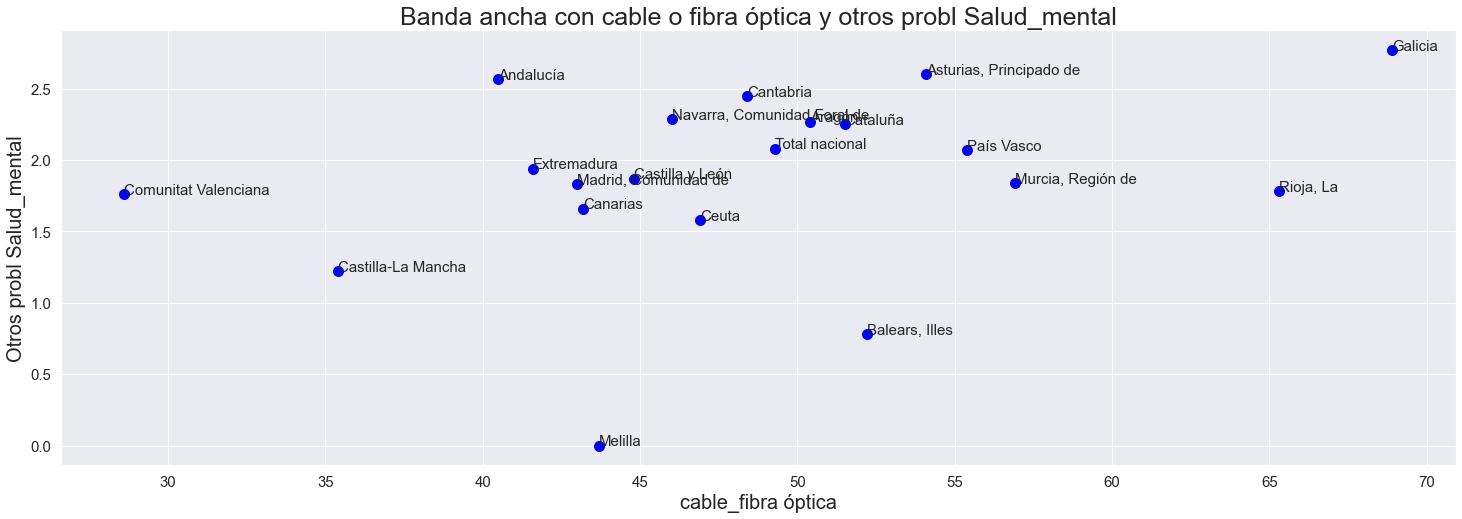

In [226]:
annotations=["Andalucía","Aragón","Asturias, Principado de","Balears, Illes","Canarias","Cantabria","Castilla y León","Castilla-La Mancha", "Cataluña","Ceuta","Comunitat Valenciana", "Extremadura","Galicia","Madrid, Comunidad de","Melilla","Murcia, Región de", "Navarra, Comunidad Foral de","País Vasco","Rioja, La", "Total nacional"]

plt.figure(figsize=(25,8))
plt.scatter(TICS_Salud_Mental['cable_fibra optica'],TICS_Salud_Mental['Otros probl Salud_mental'], s=100,color="blue")
plt.xlabel("cable_fibra óptica", fontsize =20)
plt.ylabel("Otros probl Salud_mental", fontsize =20)
plt.title("Banda ancha con cable o fibra óptica y otros probl Salud_mental",fontsize=25)
for i, label in enumerate(annotations):
    plt.text(TICS_Salud_Mental['cable_fibra optica'][i], TICS_Salud_Mental['Otros probl Salud_mental'][i],label, fontsize =15)
plt.tick_params (labelsize =15)

plt.savefig("../reports/Análisis/Fibra_Óptica_Otros_probl_salud_mental.jpg", bbox_inches='tight')

# Desagregación de actividades realizadas en el EDA


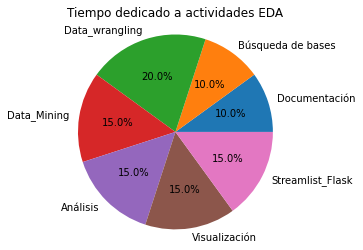

<Figure size 432x288 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt

Tiempo = [10,10,20,15,15,15,15]

Actividades = 'Documentación','Búsqueda de bases','Data_wrangling', 'Data_Mining', 'Análisis', 'Visualización', 'Streamlist_Flask'
plt.pie(Tiempo,labels=Actividades,autopct='%1.1f%%')
plt.title('Tiempo dedicado a actividades EDA')
plt.axis('equal')
plt.show()

plt.savefig("../reports/Tiempo_dedicado_EDA.jpg", bbox_inches='tight')